In [13]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.stats import beta

matplotlib.rcParams['savefig.dpi'] = 144

# What is Baysian data analysis?

- It is when you use **probability** to represent **uncertainty** in **all parts** of a statistical model.
- A flexible extension of maximum likelihood.
- Potentially the most **information-efficient** method to fit a statistical model (also computationally intensive method).
- A method for figuring out **unknowns** that requires three things:
    - Data
    - A generative model
    - Priors. What information the model has before seeing the data.

## What is a generative model?

Any kind of computer program, mathematical expression or set of rules that you can feed fixed parameter values and generates simulated data. A typical example of generative model is probability distributions like the Normal distribution that you can simulate data. A generative model is great if you know what parameter values you want and you are interested in finding out how much the data vary, given those parameters.  

But often we are in the complete opposite situation. We know what the data is and it's not uncertain and we are interested in set of reasonable parameter values that could have given rise to this data. In other words we want to work our way backwards from the data the we know to learn the parameters that we don't know. This is the case that Baysian Inference becomes useful.   

![generative_models](images/generative_models.jpg)

## A Motivating Example: Subscription rate for Chocolate Therapy Inc.

<img src="images/Chocolate.jpg",width=300>

Chocolate Therapy Inc is a our company that makes money by selling chocolate subscriptions. Customers sign up for a year of Chocolate Therapy and get weekly chocolates delivered to their address. So far we have been active in D.C. area but we are planning to extend our service to MD and VA as well. How should we enter these new market?

Our CEO, Coco McChocface, came up with a plan and put together a colorful brochure along side with chocolate samples that advertises our subscription plan. We have already tried this method on 16 people from MD and VA and 6/16 subscribed. 

Now we would like to assess our method of advertisement. What should we expect the subscription rate to be if we start sending the brochures in large scale? We can start by calculating the rate from our data 6/16 (38%). However given the small sample size, we would like to know how accurate this subscription rate is.

In summary we would like to know what's a good guess for the percentage of signups and how uncertain is this percentage?

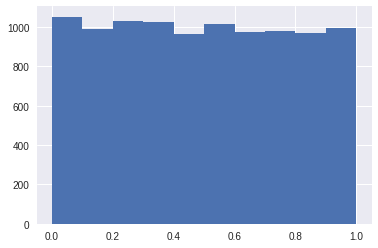

In [32]:
# Number of random draws from the prior
n_draw = 10000

# Defining and drawing from the prior distribution 
prior_rate = pd.Series(np.random.uniform(0, 1, size = n_draw)) 
#prior_rate = pd.Series(np.random.beta(2, 9, size = n_draw))

# It's always good to eyeball the prior to make sure it looks ok.
prior_rate.hist()

 Number of draws left: 653
 Posterior mean: 0.385
 Posterior median: 0.380
 Posterior 95% quantile interval: 0.189-0.607


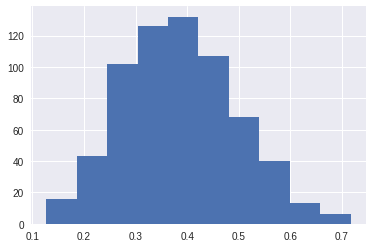

In [33]:
# Defining the generative model
def gen_model(prob):
    return(np.random.binomial(16, prob))

#  the generative model
subscribers = []

# Simulating the data
for p in prior_rate:
    subscribers.append(gen_model(p))
                    
# Observed data
observed_data = 6

# Here you filter off all draws that do not match the data.
post_rate = prior_rate[list(map(lambda x: x == observed_data, subscribers))]

post_rate.hist() # Eyeball the posterior

# See that we got enought draws left after the filtering. 
# There are no rules here, but you probably want to aim for >1000 draws.

# Now you can summarize the posterior, where a common summary is to take the mean or the median posterior, 
# and perhaps a 95% quantile interval.

print(' Number of draws left: %d\n Posterior mean: %.3f\n Posterior median: %.3f\n Posterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate), post_rate.mean(), post_rate.median(), post_rate.quantile(.025), post_rate.quantile(.975)))

In [31]:
#x = np.arange(0, 1.01, 0.01)

#pd.DataFrame({'B(10, 10)' : beta.pdf(x, 10, 10),
#                   'B(5, 2)' : beta.pdf(x, 5, 2),
#                   'B(2, 2)' : beta.pdf(x, 2, 2),
#                   'B(1, 1)' : beta.pdf(x, 1, 1),
#                   'B(.1, .5)' : beta.pdf(x, .1, .5)}, index = x).plot()

## What have we done so far?

- We have specified prior (belief) information P($\Theta$).
- A generative model that provides us with P(D | $\Theta$) also known as likelihood.
- And have calculated the probability of different parameter values P($\Theta$ | D) known as posterior or our new belief.

$$P(\Theta | D) = \frac {P(\Theta) \times P(D | \Theta)} {\sum P(\Theta) \times P(D | \Theta)}$$

- We used a binomial model with one parameter, but the general method works for **any** generative model and with **any** number of parameters.
- In case of using a uniform prior, the result is also known as **Maximum Likelihood Estimate (MLE)**.
- If the posterior distributions are in the same family as the prior probability, then they are called **conjugate distributions**.
- A better prior knowledge will result in a sharper posterior distribution and a better estimation of **Maximum A Posteriori (MAP)**. 

## Final remarks

We can use our prior knowledge about a problem (e.g. age is greater zero, temperature is greater than -273 and ...) and build it in, then we can get sharper estimates with fewer measurments. However we also want to be able to be surprised by our data. Inaccurate beliefs can makeit hard or impossible to learn.

"It ain't what you don't know that gets you into trouble. It's what you know for sure that just ain't so."

Mark Twain
